# An overview of MetaPhlan and HuMANN results



## Hostile contamination

First, let's check we have the needed files:

In [77]:
# import libraries 
import pandas as pd
import seaborn as sns
import re
 
# Use remote files
metadata_url = 'https://raw.githubusercontent.com/quadram-institute-bioscience/biobakery-2024/main/datasets/lokmer.csv'
 


## Metadata

Let's import the metadata and try to format in a more useful way

In [78]:
metadataFullDf = pd.read_csv(metadata_url)
metadataFullDf.set_index('run_accession', inplace=True)
cols = ['sample_title', 'sample_description']

metadataDf = metadataFullDf[cols]

# Extracting the columns from the sample_description column
# using regular expressions
extracted_data = metadataDf['sample_description'].str.extract(r'Faecal metagenome of a (\d+) old (female|male) from ([^,]+), (\w+)')
extracted_data.columns = ['age', 'sex', 'location', 'country']

# Concatenating the extracted columns back to the original DataFrame
metadataDf = pd.concat([metadataDf, extracted_data], axis=1)
metadataDf.drop('sample_description', axis=1, inplace=True)

# We extracted pieces of strings, but age is numbers
metadataDf['age'] = pd.to_numeric(metadataDf['age'])
# Display the DataFrame
metadataDf.head()
 

,sample_title,age,sex,location,country
run_accession,,,,,
ERR2619707,Cam2013_BAB01,61,male,Bandevouri,Cameroon
ERR2619708,Cam2013_BAB04,41,male,Bidou,Cameroon
ERR2619709,Cam2013_BAB06,49,female,Bidou,Cameroon
ERR2619710,Cam2013_BAB07,57,male,Bidou,Cameroon
ERR2619711,Cam2013_BAB08,53,female,Bidou,Cameroon


It's always a good idea to start exploring the metadata, checking for missing values etc. In our case we didn't have any, but we can now see how the dataset looks like

In [79]:
# How many % females?
female_ratio = (metadataDf['sex'] == 'female').mean() * 100
female_ratio


43.859649122807014

In [80]:
# How many cities? Display country, percentage in descending order
city_counts = metadataDf['location'].value_counts(normalize=True) * 100
city_counts

location
Ebodié          33.333333
Bandevouri      17.543860
Afan Essokié    15.789474
Akak            14.035088
Bidou           10.526316
Makouvé          5.263158
Ndtoua           3.508772
Name: proportion, dtype: float64

### Plotting age distribution

Let's make our first plot using the "age" column

[Text(0.5, 1.0, 'Age Distribution'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Frequency')]

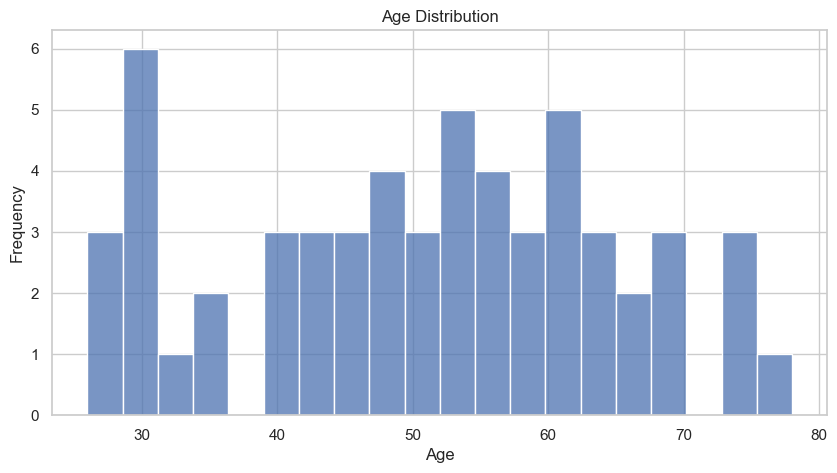

In [85]:

# First, let's sort age
metadataDf = metadataDf.sort_values(by='age')
 

# Plotting the histogram
 
sns.histplot(metadataDf['age'], kde=False, bins=20).set(
    title='Age Distribution', xlabel='Age', ylabel='Frequency')
 


In [90]:
# Can we now arbitrarily bin the samples in three groups after seeing the plot?
young_adults = (metadataDf['age'] < 40).sum()

senior = (metadataDf['age'] > 60).sum()

other = len(metadataDf) - young_adults - senior
young_adults, senior, other

(12, 17, 28)

## Import the metaphlan table

In [ ]:
mpa_url = 'https://raw.githubusercontent.com/quadram-institute-bioscience/biobakery-2024/main/datasets/lokmer_metaphlan.tsv.gz'
mpaDf = pd.read_csv(mpa_url, compression='gzip', sep='\t', header=1)
mpaDf.set_index('clade_name', inplace=True)
mpaDf.head()